# Inner and outer noise effects on round-trip time measurements

In this notebook we investigate the effects that the different noise terms in our model have on that round-trip time (RTT) measurements. As a motivation, see, in [Fig.1](#Fig.1) below, RTT data obtained in [[1]](https://ieeexplore.ieee.org/document/7102694) from the ultra-wide band testbed of [[2]](https://ieeexplore.ieee.org/document/6471216) using the RTT scheme we describe on our paper, accompanied by an example model fit.
  
 <a id="Fig.1"></a>
![RTT_experimental](fig/RTT_experimental.png)


[Fig.1](#Fig.1) also exemplifies the two distinct effects that random deviations of the physical parameters can produce on the data, either in the form of large jumps in the measured RTT or in the form of random deviations that appear directly in the signal as additive noise. 
  
As mentioned in Section II of our paper [[3]](#ourpaper), we model these effects as two independent white Gaussian noise processes, one inside the nonlinearity, indicated by $V[n]$, and one outside the nonlinearity, indicated by $W[n]$. In short, we model the observed data as 
$$
Y[n] = \delta_0 + W[n] + \frac{2\rho}{c} + T_\mathcal{S} \mathrm{mod}_{1}\!\left( f_\mathrm{d} T_\mathrm{s} n + \frac{\phi_\mathrm{d}}{2\pi} + V[n] \right)\,.
$$
The code below reproduces Fig. 5 in our paper, where changing the parameters `v_std` and `w_std` in the calls to `generate_signal` allow for the exploration of several noise conditions.

# References

[[1]](https://ieeexplore.ieee.org/document/7102694) S. Dwivedi, A. D. Angelis, D. Zachariah, and P. Händel, “Joint rangingand clock parameter estimation by wireless round trip time measurements,” IEEE Journal on Selected Areas in Communications, vol. 33, no. 11, pp. 2379–2390, Nov. 2015.

[[2]](https://ieeexplore.ieee.org/document/6471216) A. D. Angelis, S. Dwivedi, and P. Händel, “Characterization of a flexible UWB sensor for indoor localization,” IEEE Transactions on Instrumentation and Measurement, vol. 62, no. 5, pp. 905–913, May 2013.

<a id=ourpaper></a>[[3]](https://arxiv.org) Pol del Aguila Pla, Lissy Pellaco, Satyam Dwivedi, Peter Händel and Joakim Jaldén, "Clock synchronization over networks — Identifiability of the sawtooth model", Preprint, submitted to _IEEE Transactions on Automatic Control_, 2019.

In [1]:
# Import both external libraries and our own basic functions
%run imports_and_library_of_basic_functions.ipynb

In [2]:
def generate_signal( N = 200, frequency_d = 100,phase_d = 2.1,rho = 4, delta_0 = 5 * 10**(-6), T_sampling = 200 * 10**(-6),
                    T_slave = 10**(-8), w_std = 10**(-9), v_std = 10**(-9), c = 3*10**8 ):
    
    n = np.linspace(0, (N-1), N );
    np.random.seed(1)
    noise_w=np.random.randn( N )
    noise_v=np.random.randn( N )

    y = ( (frequency_d * n * T_sampling + phase_d/(2 * np.pi) + noise_v * v_std)%(1) ) * T_slave + (
        delta_0) + 2 * rho/c + noise_w * w_std

    return y

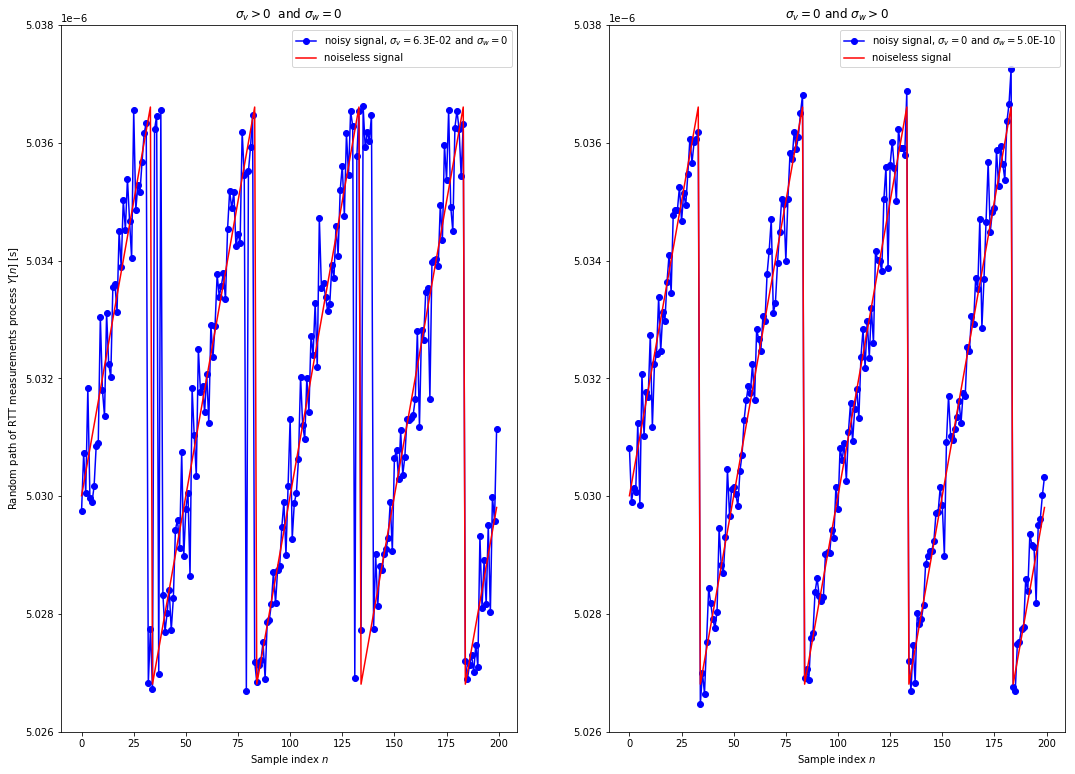

In [3]:
# Number of sampling points
N=200
# Noise standard deviations
w_std = 0.5*10**(-9)
v_std = 10**(-1.2)
# Obtain sampling points
n = np.linspace(0, (N-1), N );

# Plot results
plt.figure( figsize = [18, 13]); 
plt.subplot(121)
plt.plot( n, generate_signal(v_std=v_std,w_std=0 ), 'bo-',label=r'noisy signal, $\sigma_v=$%.1E and $\sigma_w=0$'%( v_std ) ); 
plt.plot( n, generate_signal(v_std=0,w_std=0 ), 'r-',label='noiseless signal' ); 
plt.title( r'$\sigma_v > 0$  and $\sigma_w=0$' );
plt.ylabel( r'Random path of RTT measurements process $Y[n]$ [s]' ); plt.xlabel( r'Sample index $n$');
plt.ylim((5.026*10**(-6),5.038*10**(-6)))
plt.ticklabel_format( style = 'sci', scilimits = (0, 0), axis = 'y' )
plt.legend()
plt.subplot(122)
plt.plot( n, generate_signal(v_std=0,w_std=w_std ), 'bo-',label='noisy signal, $\sigma_v=0$ and $\sigma_w=$%.1E'%( w_std )   );
plt.plot( n, generate_signal(v_std=0,w_std=0 ), 'r-',label='noiseless signal' ); 
plt.title( r'$\sigma_v=0$ and $\sigma_w > 0$ ' );
plt.xlabel( r'Sample index $n$')
plt.ylim((5.026*10**(-6),5.038*10**(-6)))
plt.ticklabel_format( style = 'sci', scilimits = (0, 0), axis = 'y' )
plt.legend()

plt.show()
